##### Note: DataCamp slides are saved to computer! Notes written on slides.

# Chapter 2 - Intro to NumPy

## TOC:
- [Understanding Data Types in Python](#Understanding-Data-Types-in-Python)
    - [Integers](#Integers)
    - [Lists](#Lists)
        - [Fixed-Type Arrays in Python](#Fixed-Type-Arrays-in-Python)
        - [Creating Arrays from Python Lists](#Creating-Arrays-from-Python-Lists)
        - [Creating Arrays from Scratch](#Creating-Arrays-from-Scratch)
    - [NumPy Standard Data Types](#NumPy-Standard-Data-Types)
- [The Basics of NumPy Arrays](#The-Basics-of-NumPy-Arrays)
    - [NumPy Array Basics](#NumPy-Array-Basics)
    - [Array Indexing: Accessing Single Elements](#Array-Indexing:-Accessing-Single-Elements)
    - [Array Slicing: Accessing Subarrays](#Array-Slicing:-Accessing-Subarrays)
        - [One-Dimensional Subarrays](#One-Dimensional-Subarrays)
        - [Multidimensional Subarrays](#Multidimensional-Subarrays)
            - [Acessing Array Rows and Columns](#Accessing-Array-Rows-and-Columns)
        - [Sub-Arrays as No-Copy Views](#Subarrays-as-No-Copy-Views)
        - [Creating Copies of Arrays](#Creating-Copies-of-Arrays)
    - [Reshaping of Arrays](#Reshaping-of-Arrays)
    - [Array Concatenation and Splitting](#Array-Concatenation-&-Spliting)
        - [Concatenation of Arrays](#Concatenation-of-Arrays)
        - [Splitting of Arrays](#Splitting-of-Arrays)
- [Computation on NumPy Arrays: Universal Functions](#Computation-on-NumPy-Arrays:-Universal-Functions)
    - [The Slowness of Loops](#The-Slowness-of-Loops)
    - [Introducing UFuncs](#Introducing-UFuncs)
    - [Exploring NumPy's Ufuncs](#Exploring-NumPy's-Ufuncs)
        - [Array Arithmetic](#Array-Arithmetic)
        - [Absolute Value](#Absolute-Value)
        - [Trigonometric Functions](#Trigonometric-Functions)
        - [Exponents and Logarithms](#Exponents-and-Logarithms)
        - [Specializeds Ufuncs](#Specialized-Ufuncs)
    - [Advanced Ufunc Features](#Advanced-Ufunc-Features)
        - [Specifying Output](#Specifying-Output)
        - [Aggregates](#Aggregates)
        - [Outer Products](#Outer-Products)
    - [Ufuncs: Learning More](#Ufuncs:-Learning-More)
- [Aggregations: Min, Max, and Everything in Between](#Aggregations:-Min,-Max,-and-Everything-in-Between)
    - [Summing the Values in an Array](#Summing-the-Values-in-an-Array)
    - [Minimum and Maximum](#Minimum-and-Maximum)
    - [Multidimensional Aggregates](#Multidimensional-Aggregates)
    - [Other Aggregation Functions](#Other-Aggregation-Functions)

---
- NumPy = Numerical Python
    - provides interface to store & efficiently operate w/(huge amounts of) data
    
[NumPy website](http://www.numpy.org)

In [92]:
import numpy as np        # import numpy
import matplotlib.pyplot as plt     # import pyplot
np.__version__        # check verison of numpy
#np?        # display built-in documentation

'1.12.1'

## Understanding Data Types in Python
### Integers
- head contains reference count, type code, size
    - reference count --> helps Python handle memory allocation
    - type code --> encode variable type
    - size --> specifies size of data members
- digit --> contains actual integer values we expect var to represent

### Lists
- Python can have lists of all same type or of mixed type
- to allow mixed type lists, each item has to be its own complete item
    - each item has to have type info, ref count, etc.
        - redundant if single type variable, takes too much space
- if list is of single type, it;s more efficient to store data in fixed-type array
    - this is a NumPy-style array

#### Fixed-Type Arrays in Python
- Python has built in `array` module
- NumPy's `ndarray` object adds efficient operations on data

In [2]:
import array
L = list(range(10))
array.array('i', L)     # i is type code indicating integer data

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Creating Arrays from Python Lists
- use `np.array`
- NumPy arrays must contain info of all same type
    - if types don't match, it'll upcast if possible
- can explicitly set data type using `dtype` keyword
- NumPy arrays can be multidimensional

In [3]:
a1 = np.array([1, 2, 3, 4])     # integer array
a1

array([1, 2, 3, 4])

In [4]:
a2 = np.array([3.14, 4, 5, 6])     # mismatched types, upcast to floating point
a2

array([ 3.14,  4.  ,  5.  ,  6.  ])

In [5]:
a3 = np.array([1,2,3,4], dtype='float32')     # explicitly set data type
a3

array([ 1.,  2.,  3.,  4.], dtype=float32)

In [6]:
a4 = np.array([range(i, i+3) for i in [2,4,6]])     # nested lists resulting in multidimensional array
a4     # results is 2D array

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

#### Creating Arrays from Scratch
- w/larger arrays, it's more efficient to create arrays from scratch using NumPy routines

In [7]:
# length-5 int array filled w/zeros
np.zeros(5, dtype='int')

array([0, 0, 0, 0, 0])

In [8]:
# 3x5 floating-point array of 1s
np.ones((3,5), dtype=float)

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

In [9]:
# 3x5 filled w/3.14
np.full((3,5), 3.14)

array([[ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14],
       [ 3.14,  3.14,  3.14,  3.14,  3.14]])

In [10]:
# linear sequence starting @ 0 ending @ 20, step by 2
# similar to range()
np.arange(0,20,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [11]:
# array of 5 values evenly spaced between 0 & 1
np.linspace(0,1,5)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [12]:
# 3x3 array of uniformly distributed random #s between 0 & 1
np.random.random((3,3))

array([[ 0.2748473 ,  0.27189202,  0.90265507],
       [ 0.08912733,  0.43522878,  0.69376269],
       [ 0.02924643,  0.36383846,  0.48373007]])

In [13]:
# 3x3 of random ints on [0, 10)
np.random.randint(0,10,(3,3))

array([[2, 6, 5],
       [2, 2, 8],
       [4, 8, 3]])

In [14]:
# 4x4 identity matrix
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [15]:
# uninitialized array of 3 ints
# values will be whatever happens to already exist @ that memory location
np.empty(3)

array([ -1.28822975e-231,  -1.28822975e-231,   1.48219694e-323])

### NumPy Standard Data Types
- data types are similar to C b/c NumPy is built in C
- when constructing an array, specify data type using `dtype`

(Table taken from [NumPy Documentation](https://docs.scipy.org/doc/numpy/user/basics.types.html))
<table border="1" class="docutils">
<colgroup>
<col width="17%" />
<col width="83%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Data type</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><code class="docutils literal"><span class="pre">bool_</span></code></td>
<td>Boolean (True or False) stored as a byte</td>
</tr>
<tr class="row-odd"><td><code class="docutils literal"><span class="pre">int_</span></code></td>
<td>Default integer type (same as C <code class="docutils literal"><span class="pre">long</span></code>; normally either
<code class="docutils literal"><span class="pre">int64</span></code> or <code class="docutils literal"><span class="pre">int32</span></code>)</td>
</tr>
<tr class="row-even"><td>intc</td>
<td>Identical to C <code class="docutils literal"><span class="pre">int</span></code> (normally <code class="docutils literal"><span class="pre">int32</span></code> or <code class="docutils literal"><span class="pre">int64</span></code>)</td>
</tr>
<tr class="row-odd"><td>intp</td>
<td>Integer used for indexing (same as C <code class="docutils literal"><span class="pre">ssize_t</span></code>; normally
either <code class="docutils literal"><span class="pre">int32</span></code> or <code class="docutils literal"><span class="pre">int64</span></code>)</td>
</tr>
<tr class="row-even"><td>int8</td>
<td>Byte (-128 to 127)</td>
</tr>
<tr class="row-odd"><td>int16</td>
<td>Integer (-32768 to 32767)</td>
</tr>
<tr class="row-even"><td>int32</td>
<td>Integer (-2147483648 to 2147483647)</td>
</tr>
<tr class="row-odd"><td>int64</td>
<td>Integer (-9223372036854775808 to 9223372036854775807)</td>
</tr>
<tr class="row-even"><td>uint8</td>
<td>Unsigned integer (0 to 255)</td>
</tr>
<tr class="row-odd"><td>uint16</td>
<td>Unsigned integer (0 to 65535)</td>
</tr>
<tr class="row-even"><td>uint32</td>
<td>Unsigned integer (0 to 4294967295)</td>
</tr>
<tr class="row-odd"><td>uint64</td>
<td>Unsigned integer (0 to 18446744073709551615)</td>
</tr>
<tr class="row-even"><td><code class="docutils literal"><span class="pre">float_</span></code></td>
<td>Shorthand for <code class="docutils literal"><span class="pre">float64</span></code>.</td>
</tr>
<tr class="row-odd"><td>float16</td>
<td>Half precision float: sign bit, 5 bits exponent,
10 bits mantissa</td>
</tr>
<tr class="row-even"><td>float32</td>
<td>Single precision float: sign bit, 8 bits exponent,
23 bits mantissa</td>
</tr>
<tr class="row-odd"><td>float64</td>
<td>Double precision float: sign bit, 11 bits exponent,
52 bits mantissa</td>
</tr>
<tr class="row-even"><td><code class="docutils literal"><span class="pre">complex_</span></code></td>
<td>Shorthand for <code class="docutils literal"><span class="pre">complex128</span></code>.</td>
</tr>
<tr class="row-odd"><td>complex64</td>
<td>Complex number, represented by two 32-bit floats (real
and imaginary components)</td>
</tr>
<tr class="row-even"><td>complex128</td>
<td>Complex number, represented by two 64-bit floats (real
and imaginary components)</td>
</tr>
</tbody>
</table>

## The Basics of NumPy Arrays
### NumPy Array Basics
`.random.seed(0)` is the seed for reproducibility
- view [this page](https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do) for a great explanation on this
- doesn't reset the random # generator, so each time you run the code, you get the same "random" numbers
- don't use if you want different numbers each time
- if you want _truly_ random numbers leave the seed value blank, so the call would be `.seed()` (see link above for more)

Attributes of NumPy arrays:
- `ndim` (# of dimensions)
- `shape` (shape of each dimension)
- `size` (total size of array)
- `dtype` (data type of array)
- `itemsize` (lists size {in bytes} of each array element)
- `nbytes` (lists total size {in bytes} of array)
    - in generally expected to equal `itemsize` times `size`

In [16]:
np.random.seed(0)     # see notes above about this, used here to follow book
x1 = np.random.randint(10, size=6)         # 1D array
x2 = np.random.randint(10, size=(3,4))     # 2D array
x3 = np.random.randint(10, size=(3,4,5))   # 3D array

print("x3 ndim:", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size:", x3.size)
print("x3 dtype", x3.dtype)
print("x3 itemsize:", x3.itemsize, "bytes")
print("x3 nbytes:", x3.nbytes, "bytes")

x3 ndim: 3
x3 shape: (3, 4, 5)
x3 size: 60
x3 dtype int64
x3 itemsize: 8 bytes
x3 nbytes: 480 bytes


### Array Indexing: Accessing Single Elements
- just like regular Python list, index counting starts at 0 & desired index is specified w/in []
- to index starting from end of array, use negative indices
    - -1 is the last element in array
- in multidimensional array, access items using comma-separated tuple of indices
    - `x2[2,-1]`
    - can modify values in this way as well
        - `x2[0,0] = 12`
- remember that NumPy array are fixed type, so if you put in a mismatched type, it'll be forced into the appropriate type

### Array Slicing: Accessing Subarrays
- can slice NumPy arrays with `:`
- NumPy slicing syntax:
    `x[start:stop:step]`
    - if any of these values is left unspecified, the defaults are:
        - `start = 0`
        - `stop =` _size of dimension_
        - `step = 1`

#### One-Dimensional Subarrays
- `np.arange(#)`
    - `.arange(start, stop, step, dtype=____)`
    - return evenly space values w/in given interval
    - start value is optional, interval includes this value
    - stop value is required, interval excludes this value
    - step value is optional, spacing between values
        - interval doesn't include this value except when `step` isn't an `int` (i.e. a `float`) in which round-off affects length of output
        - if negative, defaults for start & stop are swapped
            - easy way to reverse an array
    - dtype specification is optional
        - if unspecified, it's inferred from data

In [17]:
# help(np.arange)
a1 = np.arange(10)     # stop value of 10
a1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
a1[:5]     # first 5 elements

array([0, 1, 2, 3, 4])

In [19]:
a1[5:]     # elements after index 5

array([5, 6, 7, 8, 9])

In [20]:
a1[4:7]     # middle subarray

array([4, 5, 6])

In [21]:
a1[::2]     # every other element

array([0, 2, 4, 6, 8])

In [22]:
a1[1::2]     # every other element starting @ index 1

array([1, 3, 5, 7, 9])

In [23]:
a1[::-1]     # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [24]:
a1[5::-2]    # reversed every other from index 5

array([5, 3, 1])

#### Multidimensional Subarrays
- slicing works same as one-dimensional, w/multiple slices separated by commas
- subarray dimensions can be reversed together
- if only working w/rows, can eliminate empty slice for cols (see reversing rows below)

In [25]:
# using x2 from above
x2[:2, :3]     # 2 rows, 3 cols

array([[3, 5, 2],
       [7, 6, 8]])

In [26]:
x2[:3, ::2]     # 3 rows, every other column

array([[3, 2],
       [7, 8],
       [1, 7]])

In [27]:
x2[::-1]     # reverse rows

array([[1, 6, 7, 7],
       [7, 6, 8, 8],
       [3, 5, 2, 4]])

In [28]:
x2[:,::-1]     # reverse cols

array([[4, 2, 5, 3],
       [8, 8, 6, 7],
       [7, 7, 6, 1]])

In [29]:
x2[::-1, ::-1]     # reverse rows & columns together

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

##### Accessing Array Rows and Columns
- accessing single rows/columns is done by combining indexing & slicing using an empty slice (`:`)
- w/row access, empty slice for columns can be omitted

In [30]:
print(x2[:,0])     # first col of x2
print(x2[0])     # first row of x2, same as x2[0,:]

[3 7 1]
[3 5 2 4]


#### Subarrays as No-Copy Views
- array slices return views, not copies, of array data
- if we create a subarray & assign it no a var then modify it, the original array will be modified
    - this is default behavior & is useful when processing large datasets
    
#### Creating Copies of Arrays
- to create a copy of array (so you don't change original), use the `.copy()` method

In [31]:
print(x2)     # original array
x2_sub = x2[:2, :2]     # 2x2 subarray
x2_sub[0,0] = 99     # modify subarray
print("\n", x2)     # observe change in original

x2_sub_copy = x2[:2, :2].copy()     # create subarray copy
x2_sub_copy[0,0] = 42     # modify copy
print("\n", x2_sub_copy)     # observe changes in copy
print("\n", x2)     # no changes in original

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]

 [[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]

 [[42  5]
 [ 7  6]]

 [[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### Reshaping of Arrays
- use `.reshape()` to shape an array
- for this to work, size of initial array must match size of reshaped array
- where possible, this will create a no-copy view of the original
- conversion of 1D array into 2D row/column matrix can be done with `reshape` or by using `newaxis` w/in a slice operation

In [32]:
grid = np.arange(1,10).reshape((3,3))
print(grid)

x = np.array([1,2,3])
x.reshape((1,3))     # row vector using reshape
x[np.newaxis, :]     # row vector using newaxis
x.reshape((3,1))     # column vector using reshape
x[:, np.newaxis]     # column vector using newaxis

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1],
       [2],
       [3]])

### Array Concatenation & Spliting
#### Concatenation of Arrays
- concatenation can be accomplished using:
    - `.concatenate()`
        - takes tuple/list of arrays as first argument
        - 2nd argument is axis to join along (zero-indexed)
        - can concatenate more than 2 arrays @ once
        - can be used on 2D arrays
    - `.vstack()`
        - stacks veritcally
    - `.hstack()`
        - stacks horizonally
    - `.dstack()`
        - stacks along 3rd axis
- when using mixed dimensions, using `.vstack()`, `.hstack()`, `.dstack()` can be easier

In [33]:
# use x from above
y = np.array([3,2,1])
z = np.array([99,99,99])
# use grid from above
# use x3 from above

np.concatenate([x,y])     # concatenate 2 arrays
np.concatenate([x,y,z])     # concatenate 3 arrays

np.concatenate([grid, grid])     # concatenate along 1st axis
np.concatenate([grid, grid], axis=1)     # concatenate along 2nd axis

np.vstack([x, grid])     # vertically stack x & grid

z = z.reshape((3,1))     # reshape z

np.hstack([grid, z])     # horizonally stack grid & z

# good idea to look at x3 before looking at this output
np.dstack([x3,x3])     # dstack x3 & x3

array([[[8, 1, 5, 9, 8, 8, 1, 5, 9, 8],
        [9, 4, 3, 0, 3, 9, 4, 3, 0, 3],
        [5, 0, 2, 3, 8, 5, 0, 2, 3, 8],
        [1, 3, 3, 3, 7, 1, 3, 3, 3, 7]],

       [[0, 1, 9, 9, 0, 0, 1, 9, 9, 0],
        [4, 7, 3, 2, 7, 4, 7, 3, 2, 7],
        [2, 0, 0, 4, 5, 2, 0, 0, 4, 5],
        [5, 6, 8, 4, 1, 5, 6, 8, 4, 1]],

       [[4, 9, 8, 1, 1, 4, 9, 8, 1, 1],
        [7, 9, 9, 3, 6, 7, 9, 9, 3, 6],
        [7, 2, 0, 3, 5, 7, 2, 0, 3, 5],
        [9, 4, 4, 6, 4, 9, 4, 4, 6, 4]]])

#### Splitting of Arrays
- splitting is opposite of concatenation
- functions:
    - `.split()`
    - `.hsplit()`
    - `.vsplit()`
    - `.dsplit()`
- these functions work just like the concatenation functions
- provide a list of split points
    - N split points gives N+1 subarrays

In [34]:
x = [1, 2, 3, 99, 99, 3, 2, 1]     # array to split
x0, x1, x2 = np.split(x, [3, 5])     # split function w/array var to assign the split to
print(x1, x2, x3,"\n")     # view result of split

grid = np.arange(16).reshape((4, 4))     # reassign grid
upper, lower = np.vsplit(grid, [2])     # split grid vertically & view results
print(upper)
print(lower, "\n")

left, right = np.hsplit(grid, [2])     # split grid horizontally & view results
print(left)
print(right)

[99 99] [3 2 1] [[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]] 

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]] 

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


In [35]:
x3d = np.dstack([x3,x3])     # dstack x3 & x3
x31, x32, x33 = np.dsplit(x3d, [4,5])     # split on 3rd axis & view results
print(x31, "\n")
print(x32, "\n")
print(x33)

[[[8 1 5 9]
  [9 4 3 0]
  [5 0 2 3]
  [1 3 3 3]]

 [[0 1 9 9]
  [4 7 3 2]
  [2 0 0 4]
  [5 6 8 4]]

 [[4 9 8 1]
  [7 9 9 3]
  [7 2 0 3]
  [9 4 4 6]]] 

[[[8]
  [3]
  [8]
  [7]]

 [[0]
  [7]
  [5]
  [1]]

 [[1]
  [6]
  [5]
  [4]]] 

[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


## Computation on NumPy Arrays: Universal Functions
- key to making computations fast is using vectorized operations, generally through NumPy's _universal functions_ (ufuncs)

### The Slowness of Loops
- can time execuation using the IPython Magic `%timeit`

In [36]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
        return output

values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

big_array = np.random.randint(1,100,size=1000000)
%timeit compute_reciprocals(big_array)

The slowest run took 9.86 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.67 µs per loop


### Introducing UFuncs
- vectorized approach is designed to push loop into compiled layer underlying NumPy, leading to much faster execution
- vectorized operations in NumPy are utilized via _ufuncs_, whose main purpose is to quickly execute repeated operations on vals in NumPy arrays
- ufuncs are really flexible
    - can operate between scalar + array
    - can operate between 2 arrays
        - can be one-dimensional
        - can be multidimensional
    - can operate between arrays of different sizes & shapes
        - this is _broadcasting_, which will be explored later

### Exploring NumPy's UFuncs
- _unary ufuncs_ take a single input
- _binary ufuncs_ take 2 inputs

#### Array Arithmetic
- NumPy's ufuncs make use of Python's native math operators
    - standard addition, subtraction, multiplication, division can all be used
        - addition: +
        - subtraction: -
            - negation: -
        - multiplication: \*
            - exponents: \*\*
        - division: /
            - floor division: //
            - modulus: %
    - operations can be strung together whatever way you like & order of operations is followed

<table>
    <tr>
        <th>Operator</th>
        <th>ufunc</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>+</td>
        <td>`np.add`</td>
        <td>addition</td>
    </tr>
    <tr>
        <td>-</td>
        <td>`np.subtract`</td>
        <td>subtraction</td>
    </tr>
    <tr>
        <td>-</td>
        <td>`np.negative`</td>
        <td>unary negation</td>
    </tr>
    <tr>
        <td>*</td>
        <td>`np.multiply`</td>
        <td>mulitiplication</td>
    </tr>
    <tr>
        <td>**</td>
        <td>`np.power`</td>
        <td>exponentiation</td>
    </tr>
    <tr>
        <td>/</td>
        <td>`np.divide`</td>
        <td>division</td>
    </tr>
    <tr>
        <td>//</td>
        <td>`np.floor_divide`</td>
        <td>floor division</td>
    </tr>
    <tr>
        <td>%</td>
        <td>`np.mod`</td>
        <td>modulus/remainder</td>
    </tr>
</table>

#### Absolute Value
- NumPy understands Python's abosulute value function
    - Python: `abs()`
    - NumPy ufunc: `np.absolute()` or `np.abs()`
- when handling complex data, the ufunc returns the magnitude

#### Trigonometric Functions
- `np.pi` is the value of pi
- values are computed to w/in machine precision, which is why values that should be 0 don't always come out exactly at 0
- trig functions that are available include:
<table>
    <tr>
        <td>`np.sin()`</td>
        <td>`np.cos()`</td>
        <td>`np.tan()`</td>
    </tr>
    <tr>
        <td>`np.arcsin()`</td>
        <td>`np.arccos()`</td>
        <td>`np.arctan()`</td>
    </tr>
</table>

#### Exponents and Logarithms
- `np.exp(x)`
    - raise `e` to the x power
- `np.exp2(x)`
    - 2 to the x power
- `np.power(#, x)`
    - \# to the x power
- `np.log(x)`
    - natural log of x [ln(x)]
- `np.log2(x)`
    - log base 2 of x
- `np.log10(x)`
    - log base 10 of x
- there are specialized versions useful for maintaining precision w/very small input:
    - `np.expm1(x)`
    - `np.log1p(x)`
    - when x is very small, these give more precise values than regular log & exp

In [37]:
x = [0, 0.001, 0.01, 0.1]
print("exp(x) =", np.exp(x))
print("exp(x) - 1 =", np.expm1(x))
# print("log(x) =", np.log(x))     # don't run this, it gives a division by 0 error
print("log(1 + x) =", np.log1p(x))

exp(x) = [ 1.          1.0010005   1.01005017  1.10517092]
exp(x) - 1 = [ 0.          0.0010005   0.01005017  0.10517092]
log(1 + x) = [ 0.          0.0009995   0.00995033  0.09531018]


#### Specialized Ufuncs
- many more ufuncs are available
    - hyperbolic trig functions
    - bitwise math
    - comparision operators
    - radian to degree conversion
    - rounding & remainders
    - ... & much more!
- look though the NumPy documenation for more
- more specialized & obscure functions are available through `scipy.special`
    - see the book for (stats) example & documentation for more
        - [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/tutorial/special.html)

### Advanced Ufunc Features
#### Specifying Output
- so you can do what's in the cell below or you can do what's in the cell below that, which seems like a waste of time
    - it's using the `out` argument, which can be done on all ufuncs & array views
    - apparently the 1st way creates a temp array to hold the computation results then copies them to the assigned array
        - memory waster for large amounts of data

In [38]:
x = np.arange(5)
y = np.multiply(x,10)
y

array([ 0, 10, 20, 30, 40])

In [39]:
y = np.empty(5)
np.multiply(x, 10, out=y)
y

array([  0.,  10.,  20.,  30.,  40.])

In [40]:
y = np.zeros(10)    # using out argument on array views
np.power(2,x, out=y[::2])     # done instead of y[::2] = 2 ** x
print(y)

[  1.   0.   2.   0.   4.   0.   8.   0.  16.   0.]


#### Aggregates
- for binary ufuncs, there's some aggregates that can be computed directly from the object
- if we want to reduce an array w/an operation, use the `reduce` method of any ufunc
    - a reduce applies a given operation to the elements of an array until only a single result remains
- if we want to store all intermediate results of computation, use `accumulate` method

In [41]:
ag1 = np.arange(1,6)

add = np.add.reduce(ag1)     # reduce addition
print(add)

add = np.add.accumulate(ag1)     # accumulate addition
print(add)

mult = np.multiply.reduce(ag1)     # reduce multiplication
print(mult)

mult = np.multiply.accumulate(ag1)     # accumulate multiplication
print(mult)

15
[ 1  3  6 10 15]
120
[  1   2   6  24 120]


#### Outer Products
- any ufunc can compute output of all pairs of 2 different inputs using `outer` method
    - allows you, in one line, to create things like multiplication tables (see below)

In [42]:
mtable = np.arange(1,6)
np.multiply.outer(mtable,mtable)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

### Ufuncs: Learning More
- [NumPy Universal Function Documentation](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

## Aggregations: Min, Max, and Everything in Between
### Summing the Values in an Array
- Python's summing function is `sum()`
- NumPy's summing function is `.sum()`
- NumPy's summing function is much faster
- the functions aren't identical though
    - optional arguments have different meanings
    - NumPy's sum is aware of multiple array dimensions

### Minimum and Maximum
- Python functions: `min()` and `max()`
- NumPy functions: `.min()` and `.max()`
    - operate more quickly
- for many NumPy aggregates, a shorter syntax is to use methods of the array object itself
    - ex: `big_array.min()`
- whenever possible, make sure you're using NumPy version of the aggregates when operating on NumPy arrays

### Multidimensional Aggregates
- common type of aggregation is along a row/column
- default is that each aggregate function operates over entire array
- aggregation functions take additional argument specifying the `axis` argument
    - specifies dimension of the array that'll be collapsed (not the dimension to be returned)
    - in a 2D array, if axis is 0, aggregation will be done on columns
    - in a 2D array, if axis is 1, aggregations will be done on rows

### Other Aggregation Functions
- most aggregates have a NaN-safe counterpart that computes result while ignoring missing values, which are marked by the special IEEE floating-point NaN value
- _note: skipped example b/c didn't have data_

<table>
    <tr>
        <th>Function Name</th>
        <th>NaN-Safe Version</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>`np.sum`</td>
        <td>`np.nansum`</td>
        <td>compute sum of elements</td>
    </tr>
    <tr>
        <td>`np.prod`</td>
        <td>`np.nanprod`</td>
        <td>compute product of elements</td>
    </tr>
    <tr>
        <td>`np.mean`</td>
        <td>`np.nanmean`</td>
        <td>compute mean of elements</td>
    </tr>
    <tr>
        <td>`np.std`</td>
        <td>`np.nanstd`</td>
        <td>compute standard deviation</td>
    </tr>
    <tr>
        <td>`np.var`</td>
        <td>`np.nanvar`</td>
        <td>compute variance</td>
    </tr>
    <tr>
        <td>`np.min`</td>
        <td>`np.nanmin`</td>
        <td>find minimum value</td>
    </tr>
    <tr>
        <td>`np.max`</td>
        <td>`np.nanmax`</td>
        <td>find maximum value</td>
    </tr>
    <tr>
        <td>`np.argmin`</td>
        <td>`np.nanargmin`</td>
        <td>find index of minimum value</td>
    </tr>
    <tr>
        <td>`np.argmax`</td>
        <td>`np.nanargmax`</td>
        <td>find index of maximum value</td>
    </tr>
    <tr>
        <td>`np.median`</td>
        <td>`np.nanmedian`</td>
        <td>compute median of elements</td>
    </tr>
    <tr>
        <td>`np.percentile`</td>
        <td>`np.nanpercentile`</td>
        <td>compute rank-based statistics of elements</td>
    </tr>
    <tr>
        <td>`np.any`</td>
        <td>n/a</td>
        <td>evaluate whether any elements are true</td>
    </tr>
    <tr>
        <td>`np.all`</td>
        <td>n/a</td>
        <td>evaluate whether all elements are true</td>
    </tr>
</table>

## Computation on Arrays: Broadcasting
- another means of vectorizing operations is to use _broadcasting_ functionality
- broadcasting is simply a set of rules for applying binary ufuncs on arrays of different 

### Introducing Broadcasting
- for arrays of same size, binary operations are performed on element-by-element basis
- broadcasting lets this type of operation be performed on arrays of different sizes
- in the first 2 examples below, only one of the arrays is broadcast onto the other
- more complicated examples (third below) involve broadcasting of both arrays
    - both arrays are stretched to match a common shape

In [43]:
a = np.array([0,1,2])
a + 5      # same as adding a to an array [5,5,5]

array([5, 6, 7])

In [44]:
one = np.ones((3,3))
one + a      # [1x3] + [3x3]

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [45]:
# a from above
b = np.arange(3)[:, np.newaxis]
print(a)
print(b)
a + b      # both arrays are stretched to match common shape

[0 1 2]
[[0]
 [1]
 [2]]


array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Rules of Broadcasting
Broadcasting follows set of rules to determine interaction between arrays:
1. if the arrays differ in their number of dimensions, the shape of the one w/fewer dimensions is padded w/ones on its leading (left) side
2. if shape of the arrays doesn't match in any dimension, the array w/shape equal to 1 in that dimension is stretched to match the other shape
3. if in any dimension the sizes disagree & neither is equal to 1, an error is raised

These broadcasting rules apply to any binary ufunc.

In [47]:
# EXAMPLE 1
M = np.ones((2,3))
a = np.arange(3)

# a has fewer dimensions & needs padded + stretched to match shape of M
print(M.shape)
print(a.shape)

(2, 3)
(3,)


In [52]:
M

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [53]:
a

array([0, 1, 2])

In [54]:
M + a     # add M + a

array([[ 1.,  2.,  3.],
       [ 1.,  2.,  3.]])

In [57]:
# EXAMPLE 2
a = a.reshape((3,1))     # reshape array a
b = np.arange(3)

print(a.shape)
print(b.shape)

(3, 1)
(3,)


In [60]:
# b needs padded w/ones
# then both must be stretched to 3x3 arrays to match in size
a

array([[0],
       [1],
       [2]])

In [61]:
b

array([0, 1, 2])

In [62]:
a + b     # add a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [76]:
# EXAMPLE 3
M = np.ones((3,2))
a = np.arange(3)

print(M.shape)
print(a.shape)

(3, 2)
(3,)


In [64]:
M

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 1.,  1.]])

In [77]:
a

array([0, 1, 2])

In [80]:
# after padding a & stretching a to fit shape of M, final array sizes
# are: M(3x2) and a(3x3). The dimensions don't match, M + a raises error.
M + a

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

In [83]:
# if you REALLY want to do M + a, you could use np.newaxis to pad a on
# the right instead of left
a[:, np.newaxis].shape

(3, 1)

In [82]:
M + a[:, np.newaxis]     # addition works

array([[ 1.,  1.],
       [ 2.,  2.],
       [ 3.,  3.]])

### Broadcasting in Practice
#### Centering an Array
- centering an array is subtracting the mean from each value in the array

In [86]:
X = np.random.random((10,3))

# compute mean of each feature using mean aggregate across 1st dimension
Xmean = X.mean(0)
Xmean

array([ 0.6579597 ,  0.57523969,  0.42653567])

In [90]:
X_centered = X - Xmean     # center array X using broadcasting

# check to see if centering done correctly
# correct centering results in mean of centered array being (near) zero
# (to w/in machine-precision)
X_centered.mean(0)

array([  5.55111512e-17,  -3.33066907e-17,   4.44089210e-17])

#### Plotting a Two-Dimensional Function
- broadcasting is very useful in displaying images based on 2D functions

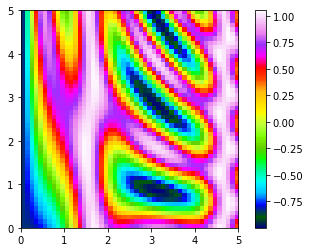

In [96]:
# x & y have 50 steps from 0 to 5
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)[:, np.newaxis]

# define z = f(x,y) using broadcasting
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

%matplotlib inline
plt.imshow(z, origin='lower', extent=[0,5,0,5],cmap='gist_ncar')
plt.colorbar();

## Comparisons, Masks, and Boolean Logic
- masking comes up when you want to extract, modify, count, or otherwise manipulate vals in an array based on some criterion

_Example: Counting Rainy Days not done_
#### Digging into the Data
- ufuncs can be used to do element-wise comparisions over arrys & we can then manipulate the results to answer questions we have

### Comparison Operators as ufuncs
- comparision operators such as < and > can be used as element-wise ufuncs
- result of comparison operators is always an array w/Boolean data type
- all 6 standara comparison operators are available

In [99]:
x = np.arange(6)
x < 3     # less than

array([ True,  True,  True, False, False, False], dtype=bool)

In [100]:
x > 3     # greater than

array([False, False, False, False,  True,  True], dtype=bool)

In [101]:
x <= 3     # less than or equal to

array([ True,  True,  True,  True, False, False], dtype=bool)

In [102]:
x >= 3     # greater than or equal to

array([False, False, False,  True,  True,  True], dtype=bool)

In [103]:
x != 3     # not equal to

array([ True,  True,  True, False,  True,  True], dtype=bool)

In [104]:
x == 3     # equal to

array([False, False, False,  True, False, False], dtype=bool)

- internally, NumPy used the ufuncs to run the above operations
- the ufunc equivalents of the above are:

<table>
    <tr>
        <th>Operator</th>
        <th>Equiv ufunc</th>
    </tr>
    <tr>
        <td>==</td>
        <td>`np.equal`</td>
    </tr>
    <tr>
        <td>!=</td>
        <td>`np.not_equal`</td>
    </tr>
    <tr>
        <td><</td>
        <td>`np.less`</td>
    </tr>
    <tr>
        <td><=</td>
        <td>`np.less_equal`</td>
    </tr>
    <tr>
        <td>></td>
        <td>`np.greater`</td>
    </tr>
    <tr>
        <td>>=</td>
        <td>`np.greater_equal`</td>
    </tr>
</table>

- these ufuncs work on arrays of any size & shape

In [112]:
x = np.random.randint(10,size=(3,4))
x

array([[2, 2, 0, 3],
       [6, 7, 2, 1],
       [4, 2, 5, 8]])

In [108]:
x < 6     # comparison ufunc on 2D array

array([[False,  True,  True, False],
       [ True,  True, False, False],
       [ True,  True, False, False]], dtype=bool)

### Working with Boolean Arrays
#### Counting Entries
- to count # of True entries in Boolean array, use `np.count_nonzero`
- another way to count # of True entries is to use `np.sum`
    - True = 1, False = 0
- use `np.any()` to check if any vals are true
- use `np.all()` to check if all vals are true
- `.sum`, `.any`, `.all` can be done along rows/cols as well
    - cols --> `axis=0`
    - rows --> `axis=1`
- be careful that you're using the NumPy verisons of the functions (& not the regular Python verisons) or they'll fail or you'll get unintended results
    - Python versions have different syntax
    - can be sure you're using the NumPy versions by using the prefix (here `np`) before the function

In [124]:
# use x from above
print(np.count_nonzero(x < 6))     # count non-zero vals less than 6

print(np.sum(x<6),'\n')     # count non-zero vals less than 6

print(np.sum(x<6, axis=0))     # count non-zero vals less than 6 per col
print(np.sum(x<6, axis=1),'\n')     # count non-zero vals less than 6 per row

print(np.any(x>8))     # any vals in x > 8?
print(np.any(x<4),'\n')     # any vals in x < 4?

print(np.all(x<10))     # all vals in x < 10?
print(np.all(x==6),'\n')     # all vals in x == 6?

print(np.any(x>5, axis=0))     # any vals in cols > 5?
print(np.all(x<5, axis=1))     # all vals in rows < 5?

9
9 

[2 2 3 2]
[4 2 3] 

False
True 

True
False 

[ True  True False  True]
[ True False False]


#### Boolean Operators
- bitwise logic operators are used to find the vals that satisfy multiple conditions
- parentheses are very important
- bitwise Boolean operators & equiv ufuncs:

<table>
    <tr>
        <th>Operator</th>
        <th>Equiv ufunc</th>
    </tr>
    <tr>
        <td>&</td>
        <td>`np.bitwise_and`</td>
    </tr>
    <tr>
        <td>|</td>
        <td>`np.bitwise_or`</td>
    </tr>
    <tr>
        <td>^</td>
        <td>`np.bitwsie_xor`</td>
    </tr>
    <tr>
        <td>~</td>
        <td>`np.bitwise_not`</td>
    </tr>
</table>

- `and` and `or` perform a single Boolean operation on an entire object, `&` and `|` perform multiple Boolean evaluations on the content of an object

### Boolean Arrays as Masks
- using Boolean arrays as masks is to select particular subsets of the data themselves
- what's returned is a 1D array filled w/all vals that meet the condition
    - all vals where the mask array is True
- by combining Boolean operations, masking operations, aggregates, we can answer questions we have about the data very quickly

In [125]:
# use x from above
print(x < 5)     # vals less than 5
x[x < 5]     # select the vals less than 5

[[ True  True  True  True]
 [False False  True  True]
 [ True  True False False]]


array([2, 2, 0, 3, 2, 1, 4, 2])

## Fancy Indexing
- fancy indexing is like simple indexing, but you pass arrays of indices instead of single scalars
- allows quick access & modifications of complicated array subsets

### Exploring Fancy Indexing

In [126]:
x = np.random.randint(100, size=10)     # create random array
x

array([39,  0, 39, 51, 46, 33, 11, 82, 24, 76])

In [127]:
# can access 3 different elements like this:
[x[3], x[7], x[2]]     # simple indexing

[51, 82, 39]

In [128]:
# can pass single list/array of indices to get same result
ind = [3,7,2]
x[ind]

array([51, 82, 39])

- w/fancy indexing, shape of result reflects shape of the index arrays rather than shape of the array being indexed
    - return value reflects broadcasted shape of indices, not shape of array being indexed
- can be used in mulitple dimensions
    - uses broadcasting
    - combining a column vector & a row vector w/in the indices gives a 2D result

In [129]:
ind = np.array([[3,7],
               [4,5]])
x[ind]     # fancy indexing

array([[51, 82],
       [46, 33]])

In [130]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [131]:
row = np.array([0,1,2])
col = np.array([2,1,3])
X[row,col]     # fancy indexing in multiple dimensions
# first index refers to row, second to col

array([ 2,  5, 11])

In [132]:
X[row[:, np.newaxis], col]     # fancy indexing w/vectors w/in indices

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

### Combined Indexing
- can combine fancy indexing w/simple indexing, slicing, masking
    - leads to very flexible set of operations for accessing & modifying array vals

In [133]:
# use X from above
print(X[2, [2,0,1]])     # fancy + simple indexing
print(X[1:, [2,0,1]])     # fancy indexing + slicing

mask = np.array([1,0,1,0], dtype=bool)
print(X[row[:,np.newaxis], mask])     # fancy indexing + masking

[10  8  9]
[[ 6  4  5]
 [10  8  9]]
[[ 0  2]
 [ 4  6]
 [ 8 10]]


_Example: Selecting Random Points_
### Modifying Values with Fancy Indexing
- to modify values in an array in the way you intend, it's best to use `.at()`
    - can be used w/ufuncs
    - does in-place application of given operator at specified indices w/specified value

In [136]:
# helpful info on .at
help(np.ufunc.at)

Help on method_descriptor:

at(...)
    at(a, indices, b=None)
    
    Performs unbuffered in place operation on operand 'a' for elements
    specified by 'indices'. For addition ufunc, this method is equivalent to
    `a[indices] += b`, except that results are accumulated for elements that
    are indexed more than once. For example, `a[[0,0]] += 1` will only
    increment the first element once because of buffering, whereas
    `add.at(a, [0,0], 1)` will increment the first element twice.
    
    .. versionadded:: 1.8.0
    
    Parameters
    ----------
    a : array_like
        The array to perform in place operation on.
    indices : array_like or tuple
        Array like index object or slice object for indexing into first
        operand. If first operand has multiple dimensions, indices can be a
        tuple of array like index objects or slice objects.
    b : array_like
        Second operand for ufuncs requiring two operands. Operand must be
        broadcastable over fi

In [139]:
x = np.zeros(10)
i = [2,3,3,4,4,4]
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


#### Example: Binning Data
- histogram example using `ufunc.at`

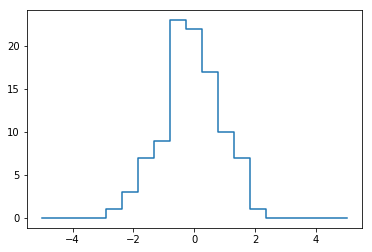

In [141]:
np.random.seed(42)
x = np.random.randn(100)

# compute histogram by hand
bins = np.linspace(-5,5,20)
counts = np.zeros_like(bins)

i = np.searchsorted(bins, x)     # find correct bin for each x
np.add.at(counts, i, 1)     # add 1 to each bin

plt.plot(bins, counts, linestyle='steps')     # plot results

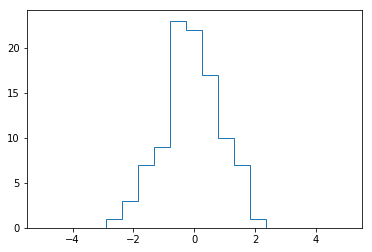

In [143]:
# use matplotlib to plot histogram, it's the same as above!
plt.hist(x, bins, histtype='step')
plt.show()

## Sorting Arrays
### Fast Sorting in NumPy: np.sort and np.argsort
- Python has bulit in `sort` and `sorted` functions
- by default, `np.sort` uses a quicksort algorithm
    - mergesort & heapsort are also available
- to return sorted version of arry w/o modifying input, use `np.sort`
- sort array in-place use the sort method of arrays, `.sort()`
- `np.argsort()` returns the indices of the sorted elements

In [146]:
x = np.array([2,1,4,3,5])
np.sort(x)     # sort array w/o modifying original

array([1, 2, 3, 4, 5])

In [147]:
x.sort()     # sort array in place
print(x)

[1 2 3 4 5]


In [149]:
x = np.array([2,1,4,3,5])     # redefine array
np.argsort(x)     # find indices of sorted vals

array([1, 0, 3, 2, 4])

#### Sorting Along Rows or Columns
- can sort along rows/cols of multidimensional array using axis argument
- this treats each row/col as independent array & any relationships between row/col vals will be lost

In [150]:
x = np.random.randint(0,10, (4,6))
print(x)

[[8 4 0 2 9 7]
 [5 7 8 3 0 0]
 [9 3 6 1 2 0]
 [4 0 7 0 0 1]]


In [151]:
np.sort(x, axis=0)     # sort each col of x

array([[4, 0, 0, 0, 0, 0],
       [5, 3, 6, 1, 0, 0],
       [8, 4, 7, 2, 2, 1],
       [9, 7, 8, 3, 9, 7]])

In [152]:
np.sort(x, axis=1)     # sort each row of x

array([[0, 2, 4, 7, 8, 9],
       [0, 0, 3, 5, 7, 8],
       [0, 1, 2, 3, 6, 9],
       [0, 0, 0, 1, 4, 7]])

### Partial Sorts: PartitioningThank 